<a href="https://colab.research.google.com/github/SimranKodwani-2003/MACHINE-LEARNING/blob/main/Evaluation_of_Hypotheses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

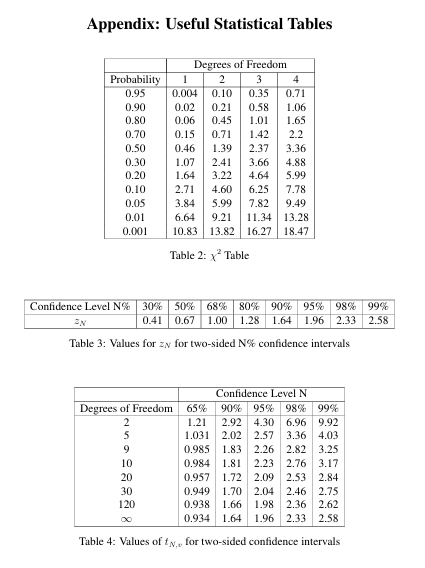

# Question-1

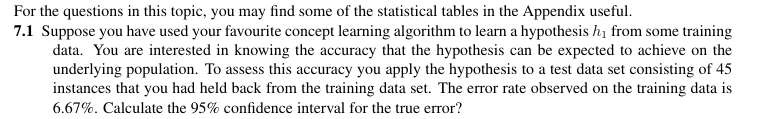

In [1]:
import math
from scipy.stats import norm

# Given values
p_hat = 0.0667  # observed error rate
n = 45
z = norm.ppf(0.975)  # 95% confidence -> two-tailed

# Standard error
se = math.sqrt((p_hat * (1 - p_hat)) / n)

# Confidence interval
lower = p_hat - z * se
upper = p_hat + z * se

print(f"95% Confidence Interval for true error: ({lower:.4f}, {upper:.4f})")

95% Confidence Interval for true error: (-0.0062, 0.1396)


# Question-2

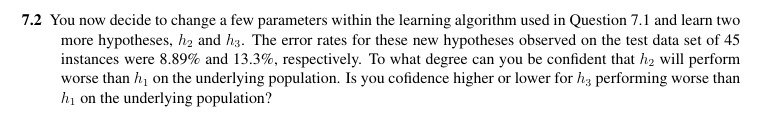

In [2]:
from math import sqrt
from scipy.stats import norm

# Sample size
n = 45

# Error rates
p1 = 0.0667  # h1
p2 = 0.0889  # h2
p3 = 0.133   # h3

def z_test(p_a, p_b, n):
    se = sqrt((p_a * (1 - p_a) + p_b * (1 - p_b)) / n)
    z = (p_b - p_a) / se
    p_val = 1 - norm.cdf(z)  # one-tailed
    confidence = (1 - p_val) * 100
    return z, p_val, confidence

# h2 vs h1
z2, p2_val, conf2 = z_test(p1, p2, n)
# h3 vs h1
z3, p3_val, conf3 = z_test(p1, p3, n)

print(f"h2 vs h1: Z = {z2:.3f}, p = {p2_val:.4f}, confidence = {conf2:.2f}%")
print(f"h3 vs h1: Z = {z3:.3f}, p = {p3_val:.4f}, confidence = {conf3:.2f}%")


h2 vs h1: Z = 0.393, p = 0.3470, confidence = 65.30%
h3 vs h1: Z = 1.055, p = 0.1456, confidence = 85.44%


# Question-3

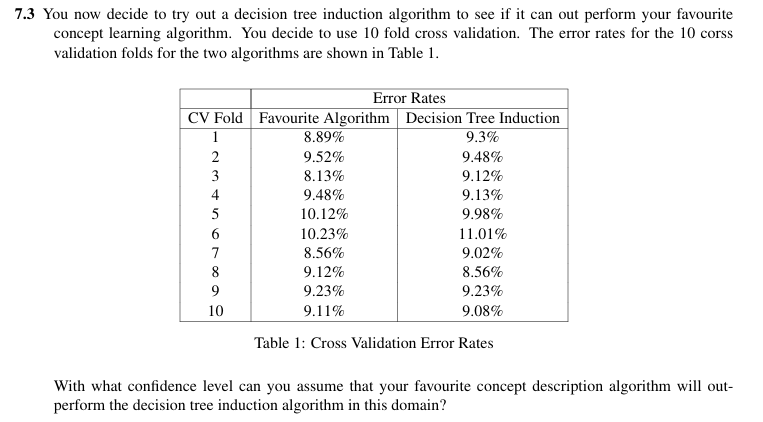

In [3]:
from scipy.stats import ttest_1samp

# Error rate differences (Favourite - Decision Tree)
diff = [-0.41, 0.04, -0.99, 0.35, 0.14, -0.78, -0.46, 0.56, 0.00, 0.03]

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(diff, 0)

# Since we want to test if Favourite < Decision Tree → left-tailed test
p_value_one_tailed = p_value / 2

# Confidence level
alpha = 0.05
confidence = (1 - p_value_one_tailed) * 100

# Result
print(f"T-statistic: {t_stat:.3f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")
print(f"Confidence level: {confidence:.2f}%")
print("Conclusion:", "Favourite algorithm is significantly better" if p_value_one_tailed < alpha else "No significant difference")


T-statistic: -0.973
One-tailed P-value: 0.1779
Confidence level: 82.21%
Conclusion: No significant difference


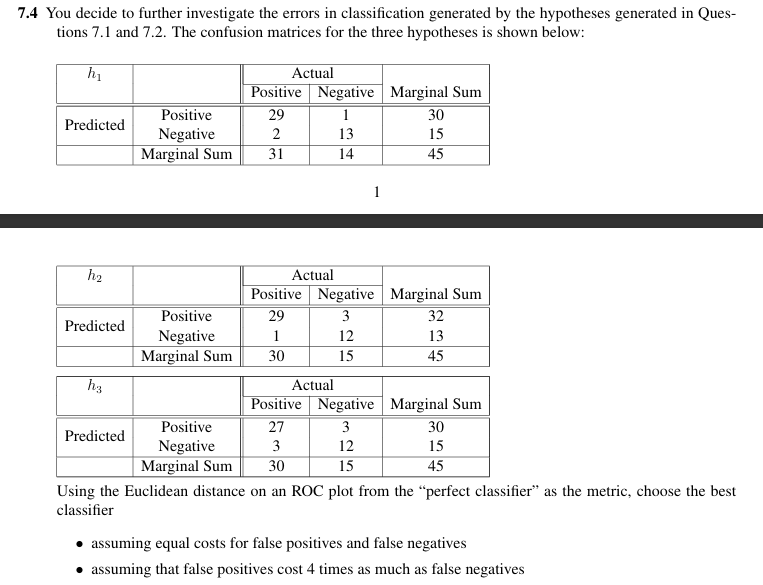

In [5]:
import math

# Define the confusion matrices for the classifiers
confusion_matrices = {
    'h1': {'TP': 29, 'FP': 2, 'TN': 13, 'FN': 1},
    'h2': {'TP': 29, 'FP': 1, 'TN': 12, 'FN': 3},
    'h3': {'TP': 27, 'FP': 3, 'TN': 12, 'FN': 3}
}

# Function to calculate TPR and FPR
def calculate_tpr_fpr(TP, FP, TN, FN):
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

# Function to calculate Euclidean distance (equal costs)
def calculate_distance(TPR, FPR):
    return math.sqrt((1 - TPR) ** 2 + FPR ** 2)

# Function to calculate weighted Euclidean distance (false positives cost 4 times more)
def calculate_weighted_distance(TPR, FPR):
    return math.sqrt((1 - TPR) ** 2 + 4 * (FPR ** 2))

# Calculate distances for each classifier
distances_equal_costs = {}
distances_weighted_costs = {}

for classifier, values in confusion_matrices.items():
    TP = values['TP']
    FP = values['FP']
    TN = values['TN']
    FN = values['FN']

    TPR, FPR = calculate_tpr_fpr(TP, FP, TN, FN)

    # Calculate distances
    distance_equal_costs = calculate_distance(TPR, FPR)
    distance_weighted_costs = calculate_weighted_distance(TPR, FPR)

    distances_equal_costs[classifier] = distance_equal_costs
    distances_weighted_costs[classifier] = distance_weighted_costs

# Display results
print("Euclidean Distances (Equal Costs):")
for classifier, distance in distances_equal_costs.items():
    print(f"{classifier}: {distance:.4f}")

print("\nEuclidean Distances (False Positives Cost 4 Times More):")
for classifier, distance in distances_weighted_costs.items():
    print(f"{classifier}: {distance:.4f}")

# Identify the best classifier in each scenario
best_classifier_equal_costs = min(distances_equal_costs, key=distances_equal_costs.get)
best_classifier_weighted_costs = min(distances_weighted_costs, key=distances_weighted_costs.get)

print("\nBest Classifier (Equal Costs):", best_classifier_equal_costs)
print("Best Classifier (False Positives Cost 4 Times More):", best_classifier_weighted_costs)


Euclidean Distances (Equal Costs):
h1: 0.1374
h2: 0.1213
h3: 0.2236

Euclidean Distances (False Positives Cost 4 Times More):
h1: 0.2687
h2: 0.1802
h3: 0.4123

Best Classifier (Equal Costs): h2
Best Classifier (False Positives Cost 4 Times More): h2
